# Multiple Linear Regression Model

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
data = pd.read_excel("data2.xlsx")

# Define the independent (X) and dependent (Y) variables
X = data[['AD', 'E', 'T']]  # Independent variables: Advertising spend (AD), E, T
Y = data['R']               # Dependent variable: Sales revenue

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the entire dataset (no train-test split)
model.fit(X, Y)

# Make predictions on the same dataset (since we are not splitting)
Y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

# Report evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Report model coefficients and intercept
print("\nModel Coefficients:")
for i, col in enumerate(X.columns):
    print(f"{col}: {model.coef_[i]}")

print("Intercept (a):", model.intercept_)

# Save the model to a file
model_filename = 'final_regression_model.joblib'
joblib.dump(model, model_filename)

print(f"\nModel saved as {model_filename}")


Mean Squared Error (MSE): 2556.4767186067875
R-squared (R²): 0.9962477351274142

Model Coefficients:
AD: 3.014258683942248
E: 5.08037702727025
T: 2.429376878178078
Intercept (a): 489.0336671457287

Model saved as final_regression_model.joblib



AD Regression Results:
Intercept (a): 747.1345229748149
Slope (b): 3.0205612398192945
Mean Squared Error: 22026.490024969164
R-squared: 0.966321132880102


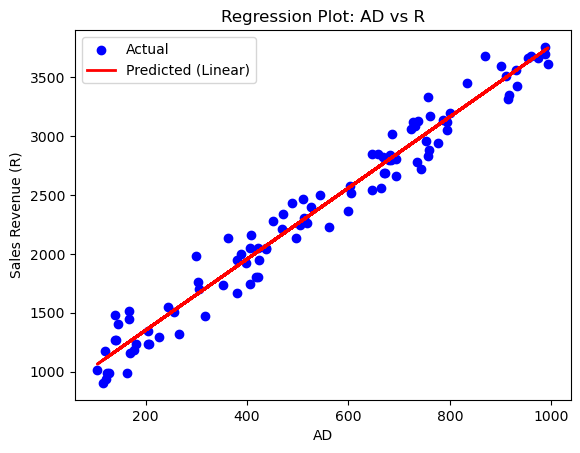


E Regression Results:
Intercept (a): 2157.0025022679165
Slope (b): 5.298452803004213
Mean Squared Error: 635628.258722476
R-squared: 0.028113892004616226


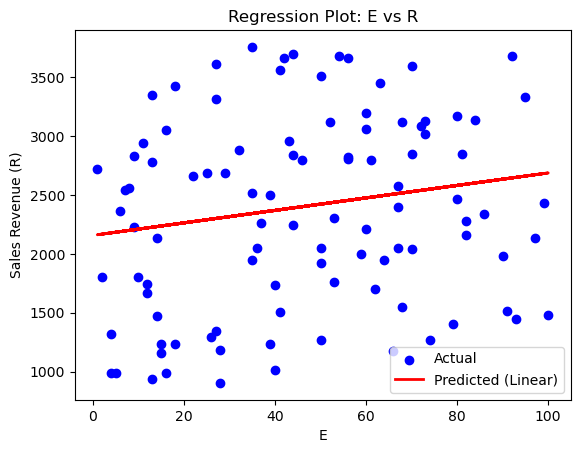


T Regression Results:
Intercept (a): 2296.2550565179795
Slope (b): 24.030832329094665
Mean Squared Error: 676178.7471018147
R-squared: -0.033888474610608066


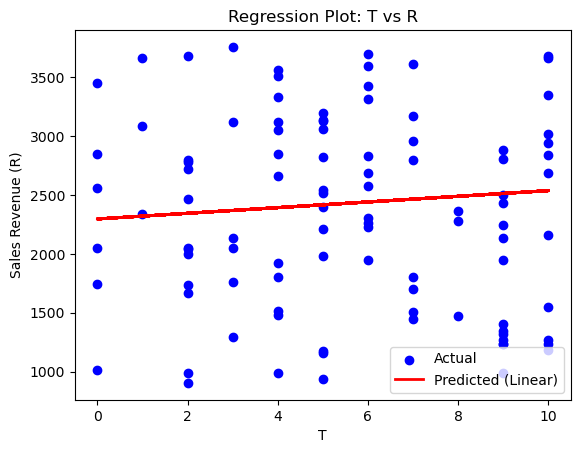


Results for AD:
Intercept: 747.1345229748149
Slope: 3.0205612398192945
Mean Squared Error: 22026.490024969164
R-squared: 0.966321132880102

Results for E:
Intercept: 2157.0025022679165
Slope: 5.298452803004213
Mean Squared Error: 635628.258722476
R-squared: 0.028113892004616226

Results for T:
Intercept: 2296.2550565179795
Slope: 24.030832329094665
Mean Squared Error: 676178.7471018147
R-squared: -0.033888474610608066


In [10]:
# For figures
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
data = pd.read_excel("data2.xlsx")

# Define the dependent variable Y
Y = data['R']

# Define independent variables
independent_vars = ['AD', 'E', 'T']

# Initialize dictionary to store results
results = {}

# Function to plot simple linear regression for each independent variable and report results
def plot_simple_linear_regression(X_var, X_label):
    # Reshape X_var for fitting the model
    X_var = X_var.values.reshape(-1, 1)
    
    # Split the dataset into training and testing sets (80% training, 20% testing)
    X_train, X_test, Y_train, Y_test = train_test_split(X_var, Y, test_size=0.2, random_state=42)
    
    # Initialize the Linear Regression model
    model = LinearRegression()
    
    # Train the model on the training data
    model.fit(X_train, Y_train)
    
    # Predict the sales revenue using the test data
    Y_pred = model.predict(X_test)
    
    # Model evaluation
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    # Get the intercept and coefficient
    intercept = model.intercept_
    slope = model.coef_[0]
    
    # Store results in dictionary
    results[X_label] = {
        'Intercept': intercept,
        'Slope': slope,
        'MSE': mse,
        'R2': r2
    }
    
    # Print results
    print(f"\n{X_label} Regression Results:")
    print(f"Intercept (a): {intercept}")
    print(f"Slope (b): {slope}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    
    # Plotting the regression line
    plt.figure()
    plt.scatter(X_test, Y_test, color='blue', label="Actual")
    plt.plot(X_test, Y_pred, color='red', linewidth=2, label="Predicted (Linear)")
    
    # Set titles and labels for each plot
    plt.title(f'Regression Plot: {X_label} vs R')
    plt.xlabel(X_label)
    plt.ylabel('Sales Revenue (R)')
    plt.legend()
    plt.show()

# Plot for each independent variable
for var in independent_vars:
    plot_simple_linear_regression(data[var], var)

# Summary of results for each variable
for var in independent_vars:
    print(f"\nResults for {var}:")
    print(f"Intercept: {results[var]['Intercept']}")
    print(f"Slope: {results[var]['Slope']}")
    print(f"Mean Squared Error: {results[var]['MSE']}")
    print(f"R-squared: {results[var]['R2']}")
